In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [9]:
data = pd.read_csv('../file/data_ver5.csv')

In [10]:
#data.to_csv('../file/data_ver5.csv',index=False)

In [11]:
#del data['Unnamed: 0']

In [12]:
data.head()
data2 = data.drop(columns='평균 해상 강수량')

In [13]:
#data = data.rename(columns={'평균 바다 표면 온도':'지구 평균 온도'})

In [14]:
data2.head()

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,지구 평균 온도
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000


In [15]:
#data3 = data2.drop(columns='')

In [44]:
tar = data2['sealevel'].values
fea = data2.drop(columns='sealevel').values

In [45]:
train_input, test_input, train_target, test_target = \
    train_test_split(fea, tar)

In [46]:
print(train_input.shape, test_input.shape)

(21, 7) (7, 7)


---
## 선형회귀

In [19]:
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [20]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
scores = cross_val_score(lr, train_input, train_target, cv=6)
print(f"교차검증 점수: {scores}")
print(f"교차검증 점수 평균: {scores.mean()}")

0.9755311016112116
0.9613343170775193
교차검증 점수: [ 0.85177406  0.76075845  0.9718097   0.89077478 -0.29110147  0.8503117 ]
교차검증 점수 평균: 0.6723878686989169


---
## 다항회귀

In [21]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [22]:
print(train_poly.shape,test_poly.shape)

(21, 14) (7, 14)


In [23]:
lr.fit(train_poly,train_target)

LinearRegression()

In [24]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))
scores = cross_val_score(lr, train_poly, train_target, cv=6)
print(f"교차검증 점수: {scores}")
print(f"교차검증 점수 평균: {scores.mean()}")

0.9947862665934387
0.7336986870806139
교차검증 점수: [ 0.93955547  0.39936941  0.44638991  0.55206948 -1.89939879  0.74971803]
교차검증 점수 평균: 0.1979505839962513


In [25]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge()
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))
scores = cross_val_score(ridge, train_scaled, train_target, cv=6)
print(f"교차검증 점수: {scores}")
print(f"교차검증 점수 평균: {scores.mean()}")

train score : 0.9748135414885768
test score : 0.9658837529185405
교차검증 점수: [0.84227887 0.79904602 0.98644119 0.88571278 0.31974694 0.86417229]
교차검증 점수 평균: 0.7828996812549073


## 다항은 아닌듯

---
## 스캐일 후 해보자

In [47]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [43]:
#pd.DataFrame(train_input)

,0,1,2,3,4,5,6
0,1991.0,23056.40,5.37,2.025763,9.742500,16.541667,18.073333
1,2001.0,25726.42,6.19,1.795824,9.569167,16.582500,18.199167
2,1993.0,23124.00,5.54,1.934320,9.810000,16.402500,18.022500
3,1996.0,24214.92,5.79,1.896918,9.799167,16.461667,18.033333
4,2018.0,36441.55,7.60,1.380304,8.755000,16.884167,18.455833
5,2002.0,26486.63,6.27,1.752091,9.356667,16.645000,18.231667
6,2011.0,33226.01,7.00,1.336479,8.775833,16.620000,18.225833
7,1997.0,25292.92,5.87,1.935293,9.616667,16.588333,18.178333
8,2015.0,34521.91,7.35,1.510779,8.920833,16.845833,18.526667
9,2013.0,34217.18,7.18,1.364877,9.238333,16.678333,18.312500


In [48]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [49]:


ridge = Ridge(alpha=1.5)
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))
scores = cross_val_score(ridge, train_scaled, train_target, cv=6)
print(f"교차검증 점수: {scores}")
print(f"교차검증 점수 평균: {scores.mean()}")

train score : 0.9746458248275803
test score : 0.9612007330713133
교차검증 점수: [0.95159942 0.98074496 0.97208687 0.98749784 0.96093544 0.79948409]
교차검증 점수 평균: 0.9420581050286608


In [50]:
import joblib


joblib.dump((ss, ridge), 'model_with_scaler.sea')

['model_with_scaler.sea']

In [29]:
data.head()

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,지구 평균 온도,평균 해상 강수량
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333,93.641667
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333,93.216667
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000,93.225000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500,92.508333
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000,92.841667


In [30]:
data2.head()

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,지구 평균 온도
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000


In [31]:
from joblib import dump, load

# 모델 저장
dump(ridge, 'model.sea')

# 모델 불러오기
#model = load('model.joblib')

['model.sea']

In [32]:
from joblib import dump, load


In [33]:
model = load('model.sea')

In [36]:
model.predict(new_data_scaled)

array([58.14745421])

In [35]:
pre_data = [[2019,38000,7.68,1.39,8.752000,16.9,18.47]]
new_data_scaled = ss.transform(pre_data)
ridge.predict(new_data_scaled)

array([58.14745421])

In [ ]:
61.393713	

61.393713

In [ ]:
data

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,지구 평균 온도,평균 해상 강수량
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333,93.641667
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333,93.216667
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000,93.225000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500,92.508333
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000,92.841667
5,1996,-11.947396,24214.92,5.79,1.896918,9.799167,16.461667,18.033333,93.675000
6,1997,-2.647396,25292.92,5.87,1.935293,9.616667,16.588333,18.178333,96.033333
7,1998,-10.814063,24895.32,5.95,1.830868,9.626667,16.685833,18.230833,96.666667
8,1999,-0.247396,24957.30,6.03,1.770938,9.693333,16.413333,18.031667,93.850000
9,2000,2.952604,25637.87,6.11,1.750909,9.457500,16.460833,18.065833,96.416667


In [ ]:
print(ridge.coef_)  
print(ridge.intercept_)

[ 7.01810448  4.51799813  7.21597468 -5.30427605  1.42538265  0.89767033
  2.97757316]
16.089378651285656


In [ ]:
tar = data['sealevel'].values
fea = data[' Population'].values

In [ ]:
train_input, test_input, train_target, test_target = \
    train_test_split(fea, tar)

In [ ]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [ ]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.972323207355885
0.9721680064965529


In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
ridge = Ridge()
ridge.fit(train_scaled,train_target)

Ridge()

In [ ]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.972323207355885
0.9721680064965529


In [ ]:
lr.predict([[8.0]])

array([73.00700285])

In [ ]:
print(lr.coef_,lr.intercept_)

[37.62079937] -227.95939214116606


In [ ]:
39.13740028 * 8 -236.82754385343512

76.2716583865649

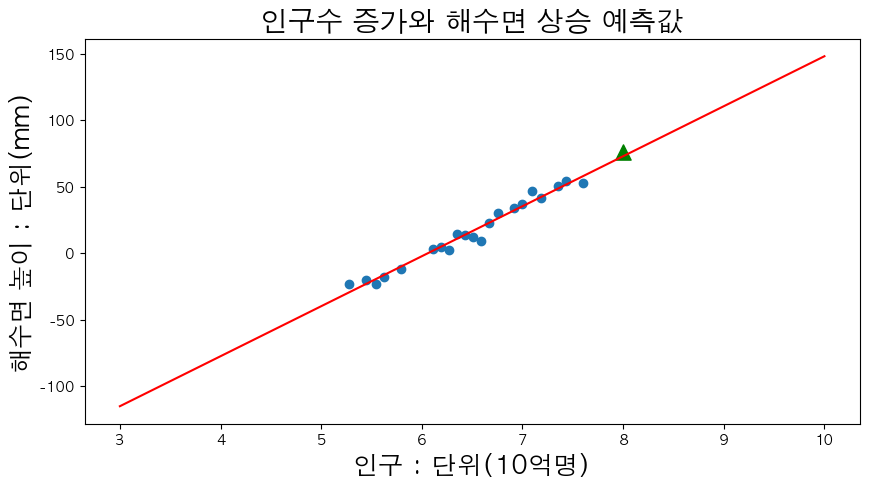

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)

# 15에서 50까지의 1차 방정식
plt.plot([3,10],[3*lr.coef_ + lr.intercept_,10*lr.coef_ + lr.intercept_],c='red')

# 50cm 생선
plt.scatter(8,76.2716583865649,marker='^',c='green',s=120)
plt.title('인구수 증가와 해수면 상승 예측값',size=20)
plt.xlabel('인구 : 단위(10억명)',size=18)
plt.ylabel('해수면 높이 : 단위(mm)',size=18)
plt.show()

In [ ]:
# tar = data['sealevel'].values
# fea = data['Thickness'].values

# train_input, test_input, train_target, test_target = \
#     train_test_split(fea, tar)

# # 1열로 구성된 배열로 재구성
# train_input = train_input.reshape(-1,1)
# test_input = test_input.reshape(-1,1)

# lr = LinearRegression()
# lr.fit(train_input,train_target)

# print(lr.score(train_input,train_target))
# print(lr.score(test_input,test_target))

# ss = StandardScaler()
# ss.fit(train_input)

# train_scaled = ss.transform(train_input)
# test_scaled = ss.transform(test_input)

# ridge = Ridge(alpha=1.6)
# ridge.fit(train_scaled,train_target)
# print("train score :",ridge.score(train_scaled,train_target))
# print("test score :",ridge.score(test_scaled,test_target))

# print(lr.predict([[1.8]]))

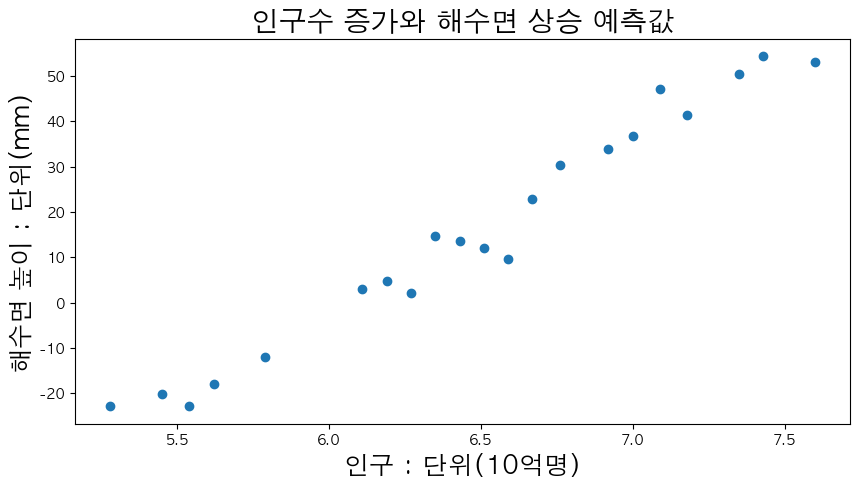

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)
#plt.plot([3,10],[3*lr.coef_ + lr.intercept_,10*lr.coef_ + lr.intercept_],c='red')
#plt.scatter(8,73.1336655211835,marker='^',c='green')
plt.title('인구수 증가와 해수면 상승 예측값',size=20)
plt.xlabel('인구 : 단위(10억명)',size=18)
plt.ylabel('해수면 높이 : 단위(mm)',size=18)
plt.show()

In [ ]:
tar = data['sealevel'].values
fea = data['Year'].values

train_input, test_input, train_target, test_target = \
    train_test_split(fea, tar)

# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

lr = LinearRegression()
lr.fit(train_input,train_target)

print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

print(lr.predict([[2020]]))
print(lr.coef_, lr.intercept_)

0.9691530192247814
0.9798976672267083
train score : 0.9691312507779988
test score : 0.980865051385204
[66.21950647]
[3.23036163] -6459.110981938031


In [ ]:
3.15509402 * 2020 -6308.282225849208

65.00769455079171

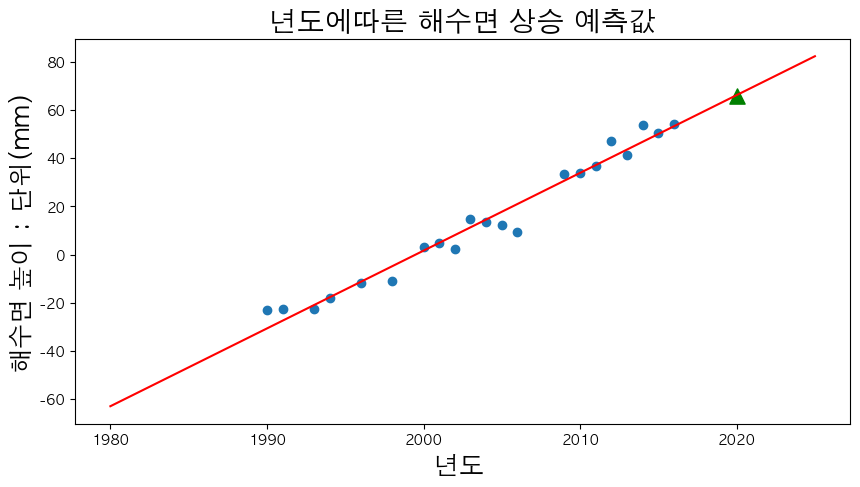

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)

plt.plot([1980,2025],[1980*lr.coef_ + lr.intercept_,2025*lr.coef_ + lr.intercept_],c='red')

plt.scatter(2020,65.82804741,marker='^',c='green',s=120)
plt.title('년도에따른 해수면 상승 예측값',size=20)
plt.xlabel('년도 ',size=18)
plt.ylabel('해수면 높이 : 단위(mm)',size=18)
plt.show()

In [ ]:
data['co2']

0     22849.92
1     23056.40
2     22988.29
3     23124.00
4     23260.29
5     24214.92
6     25292.92
7     24895.32
8     24957.30
9     25637.87
10    25726.42
11    26486.63
12    27308.37
13    28826.48
14    29663.75
15    30905.93
16    31608.28
17    31856.76
18    31769.89
19    33328.38
20    33226.01
21    33620.34
22    34217.18
23    34558.59
24    34521.91
25    35160.60
26    35588.70
27    36441.55
Name: co2, dtype: float64

In [ ]:

tar = data['sealevel'].values
fea = data['co2'].values

train_input, test_input, train_target, test_target = \
    train_test_split(fea, tar)

# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

lr = LinearRegression()
lr.fit(train_input,train_target)

print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

ridge = Ridge(alpha=0.6)
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

print(lr.predict([[38441.55]]))

0.9350992980314504
0.9333364552873595
train score : 0.9343777707953149
test score : 0.9109569614063526
[66.17452023]


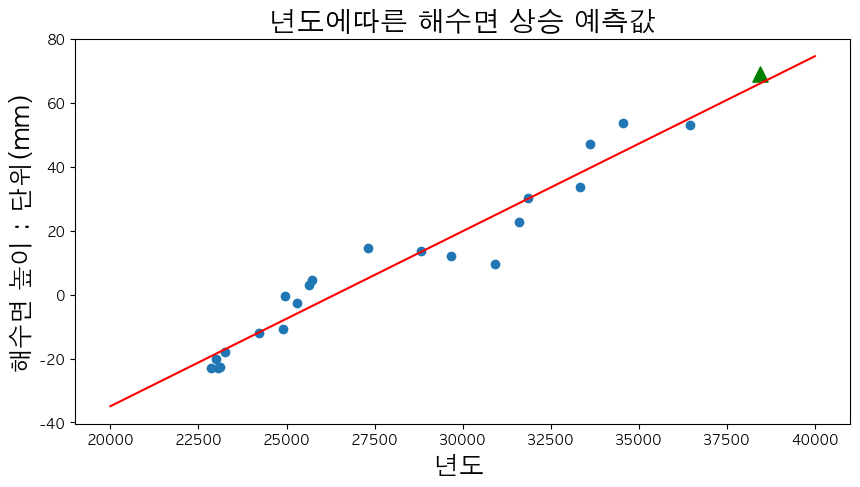

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)

plt.plot([20000,40000],[20000*lr.coef_ + lr.intercept_,40000*lr.coef_ + lr.intercept_],c='red')

plt.scatter(38441.55,69.19258518,marker='^',c='green',s=120)
plt.title('년도에따른 해수면 상승 예측값',size=20)
plt.xlabel('년도 ',size=18)
plt.ylabel('해수면 높이 : 단위(mm)',size=18)
plt.show()

In [ ]:
def sunhung(x,y,z):
    tar = data['sealevel'].values
    fea = data[f'{x}'].values

    train_input, test_input, train_target, test_target = \
        train_test_split(fea, tar)

    # 1열로 구성된 배열로 재구성
    train_input = train_input.reshape(-1,1)
    test_input = test_input.reshape(-1,1)

    lr = LinearRegression()
    lr.fit(train_input,train_target)

    print(lr.score(train_input,train_target))
    print(lr.score(test_input,test_target))

    ss = StandardScaler()
    ss.fit(train_input)

    train_scaled = ss.transform(train_input)
    test_scaled = ss.transform(test_input)

    ridge = Ridge(alpha=z)
    ridge.fit(train_scaled,train_target)
    print("train score :",ridge.score(train_scaled,train_target))
    print("test score :",ridge.score(test_scaled,test_target))

    print(lr.predict([[y]]))
    return lr.predict([[y]])

In [ ]:
data = data.rename(columns={'평균 바다 표면 온도' : '지구 평균 온도'})

In [ ]:
sunhung('북극 해빙면적 평균',8.75,7)

0.6768152380898584
0.7647322297148795
train score : 0.6345142857092418
test score : 0.6786364157026981
[38.40390713]


array([38.40390713])

In [ ]:
sunhung('북극 해빙면적 평균',8.75,7)

0.7360253585111323
0.5504844717316555
train score : 0.6900237736041865
test score : 0.4869651594440694
[40.05701217]


array([40.05701217])

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr,train_input,train_target)
scores

{'fit_time': array([0.00037003, 0.00025392, 0.0001862 , 0.00018001, 0.00016403]),
 'score_time': array([2.70843506e-04, 1.07049942e-04, 9.39369202e-05, 8.79764557e-05,
        8.70227814e-05]),
 'test_score': array([0.93431661, 0.89192757, 0.8073668 , 0.92423112, 0.96829442])}

In [ ]:
np.mean(scores['test_score'])

0.9052273050693997

In [ ]:
data

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,지구 평균 온도,평균 해상 강수량
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333,93.641667
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333,93.216667
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000,93.225000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500,92.508333
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000,92.841667
5,1996,-11.947396,24214.92,5.79,1.896918,9.799167,16.461667,18.033333,93.675000
6,1997,-2.647396,25292.92,5.87,1.935293,9.616667,16.588333,18.178333,96.033333
7,1998,-10.814063,24895.32,5.95,1.830868,9.626667,16.685833,18.230833,96.666667
8,1999,-0.247396,24957.30,6.03,1.770938,9.693333,16.413333,18.031667,93.850000
9,2000,2.952604,25637.87,6.11,1.750909,9.457500,16.460833,18.065833,96.416667
